<a href="https://colab.research.google.com/github/yaminibansal/COVID-19-viz/blob/master/COVID_19_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing COVID-19 data
As the COVID-19 pandemic takes hold, it is important that we use all the tools at our disposal to better understand what is coming... and one way to do that is to look at all the data we are getting from various parts of the world

This is a crude notebook that allows you to explore some of this data using basic python tools. The data is imported from the fantastic repository maintained by JHU CSSE https://github.com/CSSEGISandData/COVID-19. If you would like more flexibility in visualizing the data like changing the scale of the axes/align by specific times etc, this might help! 

This notebook is not intended to provide any commentary/insight into the data, merely to allow you to plot it as you wish. Hope this helps!


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [0]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)
recovered_df = pd.read_csv(recovered_url)

In [3]:
dates = confirmed_df.columns[4:].values
dates_dt = [datetime.strptime(date, '%m/%d/%y') for date in dates]
start_date = dates_dt[0]
end_date = dates_dt[-1]
print(f'Available dates = {start_date.strftime("%d %b, %Y")} to {end_date.strftime("%d %b, %Y")}')

Available dates = 22 Jan, 2020 to 12 Mar, 2020


In [0]:
locations_list = confirmed_df['Province/State'].values
locations_list = np.sort([x for x in locations_list if str(x) != 'nan']) #filter NaN

In [0]:
countries_list = np.unique(confirmed_df['Country/Region'].values)
countries_list = np.sort([x for x in countries_list if str(x) != 'nan']) #filter NaN

In [0]:
def get_columns_inds_range(p1_start_in, p1_end_in):
  p1_start_date = datetime.strptime(p1_start_in, '%Y-%m-%d')
  p1_end_date = datetime.strptime(p1_end_in, '%Y-%m-%d')

  if p1_start_date<start_date:
    p1_start_date = start_date

  if p1_end_date>end_date:
    p1_end_date = end_date

  start_ind = np.where([date_dt == p1_start_date for date_dt in dates_dt])[0][0]+4
  end_ind = np.where([date_dt == p1_end_date for date_dt in dates_dt])[0][0]+5
  date_range_dt = dates_dt[start_ind-4:end_ind-4]

  return start_ind, end_ind, date_range_dt

def plot_cumul_new(confirmed, deaths, recovered, title):
  
  if confirmed.ndim==2:
    confirmed = np.sum(confirmed, axis=0)
    deaths = np.sum(deaths, axis=0)
    recovered = np.sum(recovered, axis=0)
  
  y_label_fs = 22
  x_label_fs = 22
  legend_fs = 20
  y_ticks_fs = 20
  x_ticks_fs = 20
  title_fs = 24

  formatter = mdates.DateFormatter("%Y-%m-%d")

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

  ax1.xaxis.set_major_formatter(formatter)
  locator = mdates.DayLocator()
  ax1.xaxis.set_major_locator(locator)

  ax1.plot(date_range_dt, confirmed, '-o', label='Confirmed', color='b', lw = 2.5)
  ax2.plot(date_range_dt[1:], confirmed[1:]-confirmed[:-1], '-o', label='Confirmed', color='b', lw = 2.5)
  ax1.plot(date_range_dt, deaths, '-o', label='Deaths', color='r', lw = 2.5)
  ax2.plot(date_range_dt[1:], deaths[1:]-deaths[:-1], '-o', label='Deaths', color='r', lw = 2.5)
  ax1.plot(date_range_dt, recovered, '-o', label='Recovered', color='g', lw = 2.5)
  ax2.plot(date_range_dt[1:], recovered[1:]-recovered[:-1], '-o', label='Recovered', color='g', lw = 2.5)

  ax1.tick_params(labelsize=x_ticks_fs)
  ax2.tick_params(labelsize=x_ticks_fs)

  ax1.set_ylabel('Cumulative cases', fontsize=y_label_fs)
  ax2.set_ylabel('New cases', fontsize=y_label_fs)

  ax1.set_xticks(date_range_dt[::5])
  ax2.set_xticks(date_range_dt[::5])

  fig.autofmt_xdate()
  fig.suptitle(f'{title}', fontsize=title_fs)

  plt.show()

# Plot for cumulative/new cases for a province or county in a date window 

In [45]:
import ipywidgets as widgets
location_picker = widgets.Dropdown(options=locations_list)
display(location_picker)

/usr/local/lib/python3.6/dist-packages/traitlets/traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


Dropdown(options=('Adams, IN', 'Alachua, FL', 'Alameda County, CA', 'Alaska', 'Alberta', 'Anhui', 'Anoka, MN',…

In [81]:
location = location_picker.value
print(f'Showing stats for {location}')

Showing stats for Hubei


In [0]:
p1_start_in = '2020-01-22' #@param {type:"date"}
p1_end_in = '2020-03-12' #@param {type:"date"}

start_ind, end_ind, date_range_dt = get_columns_inds_range(p1_start_in, p1_end_in)

In [0]:
confirmed = confirmed_df.loc[confirmed_df['Province/State']==location].iloc[:,start_ind:end_ind].values[0]
deaths = deaths_df.loc[deaths_df['Province/State']==location].iloc[:,start_ind:end_ind].values[0]
recovered = recovered_df[recovered_df['Province/State']==location].iloc[:,start_ind:end_ind].values[0]

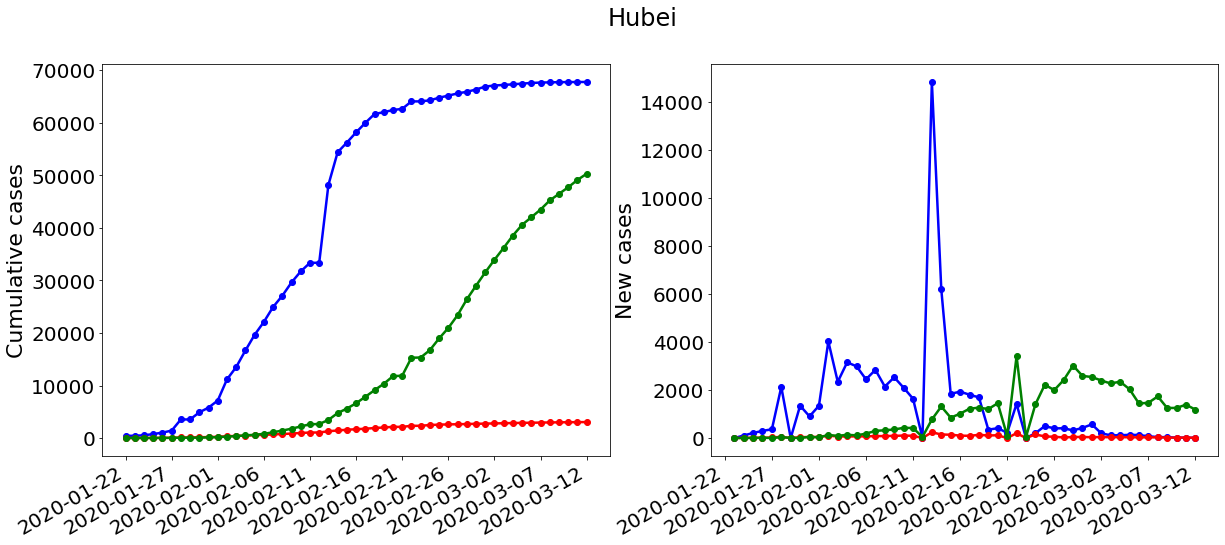

In [84]:
plot_cumul_new(confirmed, deaths, recovered, location)

# Plot by by country in a time window

In [39]:
import ipywidgets as widgets
country_picker = widgets.Dropdown(options=countries_list)
display(country_picker)

/usr/local/lib/python3.6/dist-packages/traitlets/traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


Dropdown(options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austri…

In [85]:
country = country_picker.value
print(f'Showing stats for {country}')

Showing stats for US


In [0]:
p1_start_in = '2020-01-22' #@param {type:"date"}
p1_end_in = '2020-03-12' #@param {type:"date"}

start_ind, end_ind, date_range_dt = get_columns_inds_range(p1_start_in, p1_end_in)

In [0]:
confirmed = confirmed_df.loc[confirmed_df['Country/Region']==country].iloc[:,start_ind:end_ind].values
deaths = deaths_df.loc[deaths_df['Country/Region']==country].iloc[:,start_ind:end_ind].values
recovered = recovered_df[recovered_df['Country/Region']==country].iloc[:,start_ind:end_ind].values

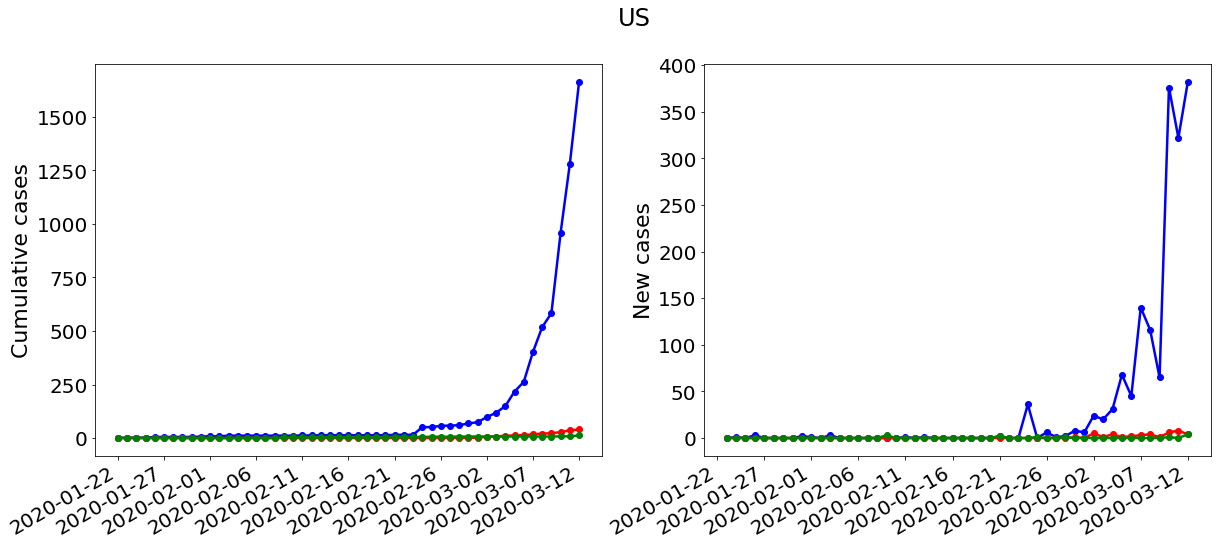

In [90]:
plot_cumul_new(confirmed, deaths, recovered, country)

# Plot all countries with 500+ cases, aligned by time of reaching 500 cases

In [143]:
case_threshold = 500
grouped = confirmed_df.groupby('Country/Region')
countries = np.unique(grouped.filter(lambda x: x[dates[-1]].sum() > case_threshold)['Country/Region'].values)
print(f'{len(countries)} countries have more than {case_threshold} cases')

15 countries have more than 500 cases


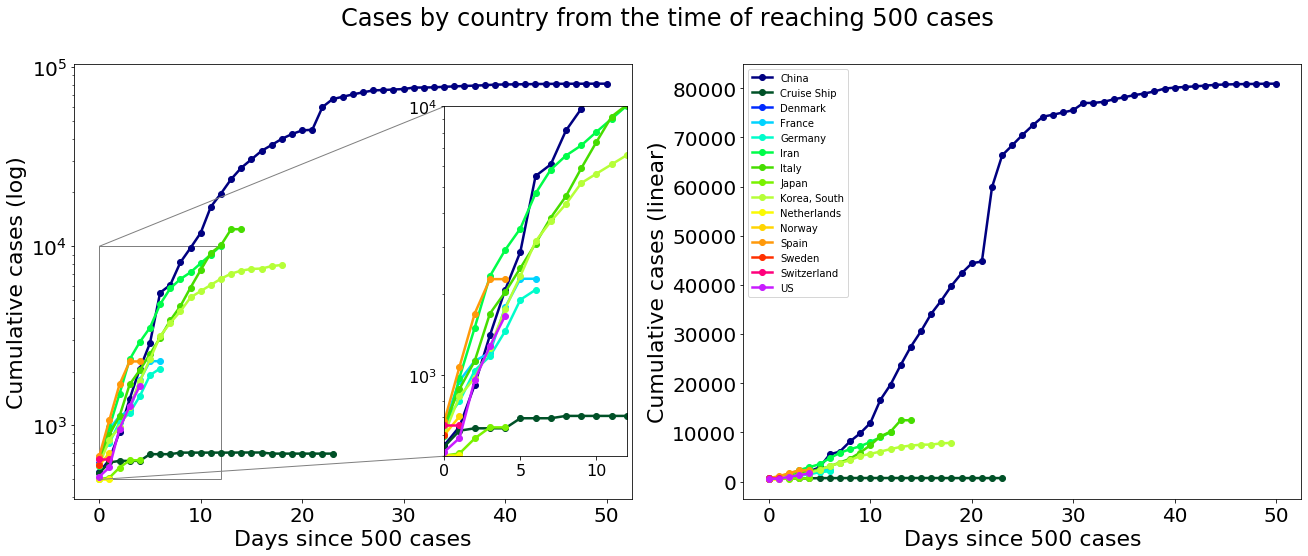

In [171]:
y_label_fs = 22
x_label_fs = 22
legend_fs = 20
y_ticks_fs = 20
x_ticks_fs = 20
title_fs = 24

colormap = plt.cm.get_cmap('gist_ncar')
num = 18
colors = []
color_inds = np.linspace(0, 255, num)
for i in range(num):
    colors.append(colormap(int(color_inds[i])))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))
axins = zoomed_inset_axes(ax1, 1.5, loc=7) # zoom-factor: 2.5, location: upper-left

i = 0
for country_name in countries:
  country_case_count = np.sum(confirmed_df.loc[confirmed_df['Country/Region']==country_name].iloc[:, 4:].values, axis=0)
  country_inds = np.where(country_case_count>case_threshold)[0]
  ax1.plot(country_case_count[country_inds], '-o', color=colors[i], label=f'{country_name}', lw = 2.5)
  axins.plot(country_case_count[country_inds], '-o', color=colors[i], label=f'{country_name}', lw = 2.5)
  ax2.plot(country_case_count[country_inds], '-o', color=colors[i], label=f'{country_name}', lw = 2.5)
  i+=1

x1, x2, y1, y2 = 0, 12, 499, 10000 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
mark_inset(ax1, axins, loc1=2, loc2=3, fc="none", ec="0.5")

ax1.tick_params(labelsize=x_ticks_fs)
ax2.tick_params(labelsize=x_ticks_fs)
axins.tick_params(labelsize=x_ticks_fs-4)

ax1.set_ylabel('Cumulative cases (log)', fontsize=y_label_fs)
ax2.set_ylabel('Cumulative cases (linear)', fontsize=y_label_fs)

ax1.set_xlabel(f'Days since {case_threshold} cases', fontsize=y_label_fs)
ax2.set_xlabel(f'Days since {case_threshold} cases', fontsize=y_label_fs)

fig.suptitle(f'Cases by country from the time of reaching {case_threshold} cases', fontsize=title_fs)

ax1.semilogy() ### Log scale on Y
axins.semilogy() ### Log scale on Y

ax2.legend()
plt.show()